https://www.kaggle.com/fernandol/cracking-the-walmart-sales-forecasting-challenge

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
sales = pd.read_csv('C:\\Analytix\\Git\\Analytix\\Projects\\2. Walmart Store Sales Forecasting\\data\\stores.csv')
sales.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [43]:
features = pd.read_csv('C:\\Analytix\\Git\\Analytix\\Projects\\2. Walmart Store Sales Forecasting\\data\\features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [44]:
train = pd.read_csv('C:\\Analytix\\Git\\Analytix\\Projects\\2. Walmart Store Sales Forecasting\\data\\train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [45]:
test = pd.read_csv('C:\\Analytix\\Git\\Analytix\\Projects\\2. Walmart Store Sales Forecasting\\data\\test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [46]:
data = features.merge(how='inner',on='Store',right=sales)
data = train.merge(on=['Store','Date'],right=data, how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [47]:
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday_y     421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 52.3+ MB


In [48]:
# data.set_index('Date', inplace=True, drop=True)
# data.head()

In [49]:
data.drop(columns=['IsHoliday_y'], inplace=True)

In [50]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


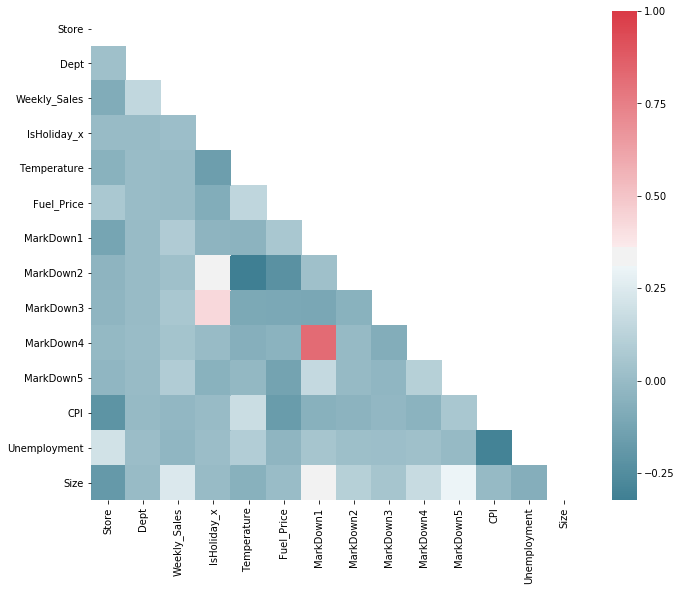

In [52]:
corr = data.corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap)
plt.show()

Dummy variable creation

In [53]:
from datetime import datetime
from datetime import timedelta

In [54]:
data['Month'] = data.Date.apply(lambda x: datetime.strftime(x,format="%m"))
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,02
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,02
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,02
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,02
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,03


In [55]:
data['Year'] = data.Date.apply(lambda x: datetime.strftime(x,format="%Y"))
data['Week'] = data.Date.apply(lambda x: datetime.strftime(x,format="%W"))
data['Quarter'] = data.Date.apply(lambda x: (int(datetime.strftime(x,format="%m")) - 1) // 3 + 1)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,Week,Quarter
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,02,2010,05,1
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,02,2010,06,1
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,02,2010,07,1
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,02,2010,08,1
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,03,2010,09,1


In [56]:
max_df = data.groupby(['Store','Dept'])['Weekly_Sales'].max()
min_df = data.groupby(['Store','Dept'])['Weekly_Sales'].min()
avg_df = data.groupby(['Store','Dept'])['Weekly_Sales'].mean()
med_df = data.groupby(['Store','Dept'])['Weekly_Sales'].median()
std_df = data.groupby(['Store','Dept'])['Weekly_Sales'].std()

In [57]:
def FeatureEngineering(store,dept,var):
    if var == 'max':
        return max_df.loc[store,dept]
    elif var == 'min':
        return min_df.loc[store,dept]
    elif var == 'avg':
        return avg_df.loc[store,dept]
    elif var == 'median':
        return med_df.loc[store,dept]
    elif var == 'std':
        return std_df.loc[store,dept]
    else:
        print(store,dept)
        return -1

data['Max_WeeklySales_by_Store_Dept'] = data.apply(lambda x: FeatureEngineering(x.Store,x.Dept,'max'), axis=1)
data['Min_WeeklySales_by_Store_Dept'] = data.apply(lambda x: FeatureEngineering(x.Store,x.Dept,'min'), axis=1)
data['Avg_WeeklySales_by_Store_Dept'] = data.apply(lambda x: FeatureEngineering(x.Store,x.Dept,'avg'), axis=1)
data['Median_WeeklySales_by_Store_Dept'] = data.apply(lambda x: FeatureEngineering(x.Store,x.Dept,'median'), axis=1)
data['Std_WeeklySales_by_Store_Dept'] = data.apply(lambda x: FeatureEngineering(x.Store,x.Dept,'std'), axis=1)

In [58]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Month,Year,Week,Quarter,Max_WeeklySales_by_Store_Dept,Min_WeeklySales_by_Store_Dept,Avg_WeeklySales_by_Store_Dept,Median_WeeklySales_by_Store_Dept,Std_WeeklySales_by_Store_Dept
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,151315,02,2010,05,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,151315,02,2010,06,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,151315,02,2010,07,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,151315,02,2010,08,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,151315,03,2010,09,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,...,151315,03,2010,10,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,...,151315,03,2010,11,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,...,151315,03,2010,12,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,...,151315,04,2010,13,2,57592.12,14537.37,22513.322937,18535.48,9854.349032
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,...,151315,04,2010,14,2,57592.12,14537.37,22513.322937,18535.48,9854.349032


In [59]:
data[data['IsHoliday_x'] == True]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Month,Year,Week,Quarter,Max_WeeklySales_by_Store_Dept,Min_WeeklySales_by_Store_Dept,Avg_WeeklySales_by_Store_Dept,Median_WeeklySales_by_Store_Dept,Std_WeeklySales_by_Store_Dept
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,151315,02,2010,06,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
31,1,1,2010-09-10,18194.74,True,78.69,2.565,NaN,NaN,NaN,...,151315,09,2010,36,3,57592.12,14537.37,22513.322937,18535.48,9854.349032
42,1,1,2010-11-26,18820.29,True,64.52,2.735,NaN,NaN,NaN,...,151315,11,2010,47,4,57592.12,14537.37,22513.322937,18535.48,9854.349032
47,1,1,2010-12-31,19124.58,True,48.43,2.943,NaN,NaN,NaN,...,151315,12,2010,52,4,57592.12,14537.37,22513.322937,18535.48,9854.349032
53,1,1,2011-02-11,37887.17,True,36.39,3.022,NaN,NaN,NaN,...,151315,02,2011,06,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
83,1,1,2011-09-09,17746.68,True,76.00,3.546,NaN,NaN,NaN,...,151315,09,2011,36,3,57592.12,14537.37,22513.322937,18535.48,9854.349032
94,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.00,55805.51,...,151315,11,2011,47,4,57592.12,14537.37,22513.322937,18535.48,9854.349032
99,1,1,2011-12-30,23350.88,True,44.55,3.129,5762.10,46011.38,260.36,...,151315,12,2011,52,4,57592.12,14537.37,22513.322937,18535.48,9854.349032
105,1,1,2012-02-10,36988.49,True,48.02,3.409,13925.06,6927.23,101.64,...,151315,02,2012,06,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
135,1,1,2012-09-07,18322.37,True,83.96,3.730,5204.68,35.74,50.94,...,151315,09,2012,36,3,57592.12,14537.37,22513.322937,18535.48,9854.349032


In [60]:
data['Super Bowl'] = np.where((data.Date == datetime(2010,2,12)) | (data.Date == datetime(2011,2,11)) | (data.Date == datetime(2012,2,10)) | (data.Date == datetime(2013,2,8)),'yes','no')
data['Labor Day'] = np.where((data.Date == datetime(2010,9,10)) | (data.Date == datetime(2011,9,9)) | (data.Date == datetime(2012,9,7)) | (data.Date == datetime(2013,9,6)),'yes','no')
data['Thanksgiving'] = np.where((data.Date == datetime(2010,11,26)) | (data.Date == datetime(2011,11,25)) | (data.Date == datetime(2012,11,23)) | (data.Date == datetime(2013,11,29)),'yes','no')
data['Christmas'] = np.where((data.Date == datetime(2010,12,31)) | (data.Date == datetime(2011,12,30)) | (data.Date == datetime(2012,12,28)) | (data.Date == datetime(2013,12,27)),'yes','no')

In [61]:
cat_vars = ['Store',
            'Dept',
            'Type',
            'IsHoliday_x',
            'Month',
            'Year',
            'Week',
            'Quarter',
            'Super Bowl',
            'Labor Day',
            'Thanksgiving',
            'Christmas'
           ]

In [62]:
def createDummyVariables(df,col):
    df_dummy = pd.get_dummies(data=df[col],drop_first=True,prefix=col)
    df = pd.concat([df,df_dummy],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [63]:
data_cat = data[cat_vars]
for feature in cat_vars:
    data_cat = createDummyVariables(data_cat,feature)
data_cat.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 198 columns):
Store_2             421570 non-null uint8
Store_3             421570 non-null uint8
Store_4             421570 non-null uint8
Store_5             421570 non-null uint8
Store_6             421570 non-null uint8
Store_7             421570 non-null uint8
Store_8             421570 non-null uint8
Store_9             421570 non-null uint8
Store_10            421570 non-null uint8
Store_11            421570 non-null uint8
Store_12            421570 non-null uint8
Store_13            421570 non-null uint8
Store_14            421570 non-null uint8
Store_15            421570 non-null uint8
Store_16            421570 non-null uint8
Store_17            421570 non-null uint8
Store_18            421570 non-null uint8
Store_19            421570 non-null uint8
Store_20            421570 non-null uint8
Store_21            421570 non-null uint8
Store_22            421570 non-null uint8
Store_

In [64]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Quarter,Max_WeeklySales_by_Store_Dept,Min_WeeklySales_by_Store_Dept,Avg_WeeklySales_by_Store_Dept,Median_WeeklySales_by_Store_Dept,Std_WeeklySales_by_Store_Dept,Super Bowl,Labor Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,1,57592.12,14537.37,22513.322937,18535.48,9854.349032,no,no,no,no
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,1,57592.12,14537.37,22513.322937,18535.48,9854.349032,yes,no,no,no
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,1,57592.12,14537.37,22513.322937,18535.48,9854.349032,no,no,no,no
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,1,57592.12,14537.37,22513.322937,18535.48,9854.349032,no,no,no,no
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,1,57592.12,14537.37,22513.322937,18535.48,9854.349032,no,no,no,no


In [65]:
df = pd.concat([data[data.columns.difference(cat_vars)],data_cat],axis=1)
df.head()

,Avg_WeeklySales_by_Store_Dept,CPI,Date,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Max_WeeklySales_by_Store_Dept,...,Week_50,Week_51,Week_52,Quarter_2,Quarter_3,Quarter_4,Super Bowl_yes,Labor Day_yes,Thanksgiving_yes,Christmas_yes
0,22513.322937,211.096358,2010-02-05,2.572,NaN,NaN,NaN,NaN,NaN,57592.12,...,0,0,0,0,0,0,0,0,0,0
1,22513.322937,211.242170,2010-02-12,2.548,NaN,NaN,NaN,NaN,NaN,57592.12,...,0,0,0,0,0,0,1,0,0,0
2,22513.322937,211.289143,2010-02-19,2.514,NaN,NaN,NaN,NaN,NaN,57592.12,...,0,0,0,0,0,0,0,0,0,0
3,22513.322937,211.319643,2010-02-26,2.561,NaN,NaN,NaN,NaN,NaN,57592.12,...,0,0,0,0,0,0,0,0,0,0
4,22513.322937,211.350143,2010-03-05,2.625,NaN,NaN,NaN,NaN,NaN,57592.12,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.info(max_cols=250)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 215 columns):
Avg_WeeklySales_by_Store_Dept       421570 non-null float64
CPI                                 421570 non-null float64
Date                                421570 non-null datetime64[ns]
Fuel_Price                          421570 non-null float64
MarkDown1                           150681 non-null float64
MarkDown2                           111248 non-null float64
MarkDown3                           137091 non-null float64
MarkDown4                           134967 non-null float64
MarkDown5                           151432 non-null float64
Max_WeeklySales_by_Store_Dept       421570 non-null float64
Median_WeeklySales_by_Store_Dept    421570 non-null float64
Min_WeeklySales_by_Store_Dept       421570 non-null float64
Size                                421570 non-null int64
Std_WeeklySales_by_Store_Dept       421533 non-null float64
Temperature                         421570 

Missing values

In [67]:
# data.drop(columns=['max'],inplace=True)

In [68]:
df.isnull().sum()

Avg_WeeklySales_by_Store_Dept            0
CPI                                      0
Date                                     0
Fuel_Price                               0
MarkDown1                           270889
MarkDown2                           310322
MarkDown3                           284479
MarkDown4                           286603
MarkDown5                           270138
Max_WeeklySales_by_Store_Dept            0
Median_WeeklySales_by_Store_Dept         0
Min_WeeklySales_by_Store_Dept            0
Size                                     0
Std_WeeklySales_by_Store_Dept           37
Temperature                              0
Unemployment                             0
Weekly_Sales                             0
Store_2                                  0
Store_3                                  0
Store_4                                  0
Store_5                                  0
Store_6                                  0
Store_7                                  0
Store_8    

In [69]:
def MissingTreatment(x):
    x = x.fillna(0)
    return x
df = df.apply(lambda x: MissingTreatment(x))
df.info(max_cols=250)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 215 columns):
Avg_WeeklySales_by_Store_Dept       421570 non-null float64
CPI                                 421570 non-null float64
Date                                421570 non-null datetime64[ns]
Fuel_Price                          421570 non-null float64
MarkDown1                           421570 non-null float64
MarkDown2                           421570 non-null float64
MarkDown3                           421570 non-null float64
MarkDown4                           421570 non-null float64
MarkDown5                           421570 non-null float64
Max_WeeklySales_by_Store_Dept       421570 non-null float64
Median_WeeklySales_by_Store_Dept    421570 non-null float64
Min_WeeklySales_by_Store_Dept       421570 non-null float64
Size                                421570 non-null int64
Std_WeeklySales_by_Store_Dept       421570 non-null float64
Temperature                         421570 